<a href="https://colab.research.google.com/github/vikrantpotnis123/DS/blob/master/tensorflow_basics_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%tensorflow_version 1.x

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def generate_dataset():
  x_batch = np.linspace(-1,1, 101)
  # y = 2x + e*0.3, e is sampled for normal distribuion 
  y_batch = 2*x_batch + np.random.randn(*x_batch.shape)*0.3
  return x_batch, y_batch


In [27]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None,), name='x')
  y = tf.placeholder(tf.float32, shape=(None,), name='y')
  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal,  name='W')
    y_pred = tf.multiply(w, x)
    loss = tf.reduce_mean(tf.square(y_pred - y))
  return x, y, y_pred, loss
    

In [30]:
def run_graph():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()
  optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # training
    for _ in range(30):
      loss_val, _ = sess.run([loss, optimizer], {x:x_batch, y:y_batch})
      print('loss: ', loss_val.mean())
    #inference
    y_pred_batch = sess.run(y_pred, {x:x_batch})
    plt.figure(1)
    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch)

loss:  0.9323035
loss:  0.8202997
loss:  0.7230106
loss:  0.6385029
loss:  0.5650975
loss:  0.5013358
loss:  0.44595087
loss:  0.39784217
loss:  0.35605386
loss:  0.31975546
loss:  0.28822583
loss:  0.26083842
loss:  0.23704904
loss:  0.21638508
loss:  0.1984358
loss:  0.18284465
loss:  0.16930182
loss:  0.15753818
loss:  0.14732002
loss:  0.13844427
loss:  0.13073456
loss:  0.12403772
loss:  0.11822072
loss:  0.113167904
loss:  0.10877891
loss:  0.104966514
loss:  0.101654984
loss:  0.098778516
loss:  0.09627996
loss:  0.09410964


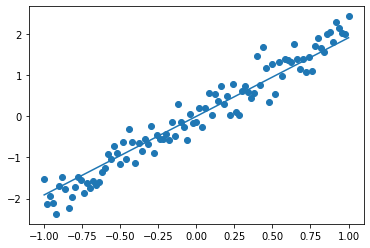

In [31]:
if __name__ == '__main__':
  run_graph()